In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score

# Load data
df = pd.read_csv('finall.csv')  # Change filename if needed

# Drop rows where the target variable 'E_Fermi (eV)' is NaN
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Perform 5-fold cross-validation using R² score
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print individual R² scores and their average
print("R² scores for each fold:", r2_scores)
print("Average R² score:", r2_scores.mean())


R² scores for each fold: [0.38606142 0.60170856 0.7005777  0.47005244 0.61877581]
Average R² score: 0.5554351856953671


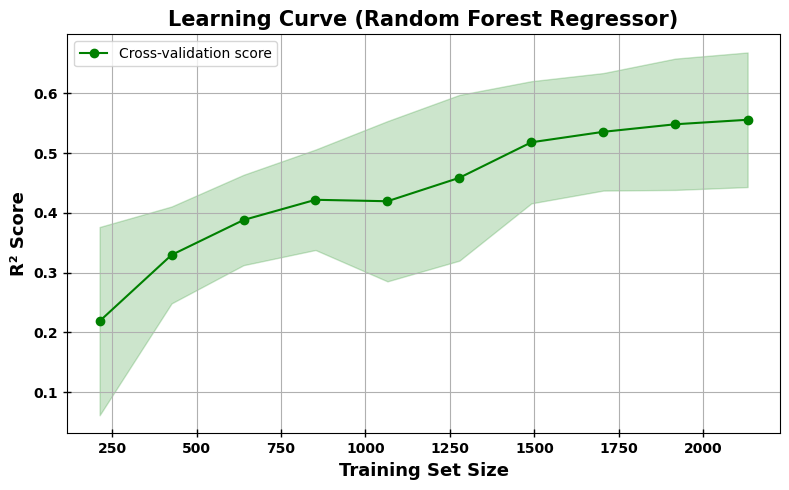

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Generate learning curve data
train_sizes, _, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Calculate mean and std for test scores only
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve (only cross-validation score)
plt.figure(figsize=(8, 5))

plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

# Set title and labels with bold font
plt.title('Learning Curve (Random Forest Regressor)', fontsize=15, fontweight='bold')
plt.xlabel('Training Set Size', fontsize=13, fontweight='bold')
plt.ylabel('R² Score', fontsize=13, fontweight='bold')

# Set tick direction and bold tick labels
plt.tick_params(axis='both', direction='inout', length=6, width=1)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('learning_curve_cv_only.png', dpi=300)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score
from xgboost import XGBRegressor

# Load the dataset
df = pd.read_csv('finall.csv')  # Change filename if needed

# Drop rows with missing target values
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# Sanitize column names for XGBoost
X.columns = X.columns.str.replace('[\[\]<>]', '_', regex=True)

# Initialize XGBoost Regressor
model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)

# Perform 5-fold cross-validation
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("R² scores from 5-fold CV:", r2_scores)
print("Mean R² score:", r2_scores.mean())
print("Standard Deviation of R² scores:", r2_scores.std())


R² scores from 5-fold CV: [0.4830492  0.65638545 0.75927476 0.58100408 0.67785775]
Mean R² score: 0.6315142459164378
Standard Deviation of R² scores: 0.0934689174820225


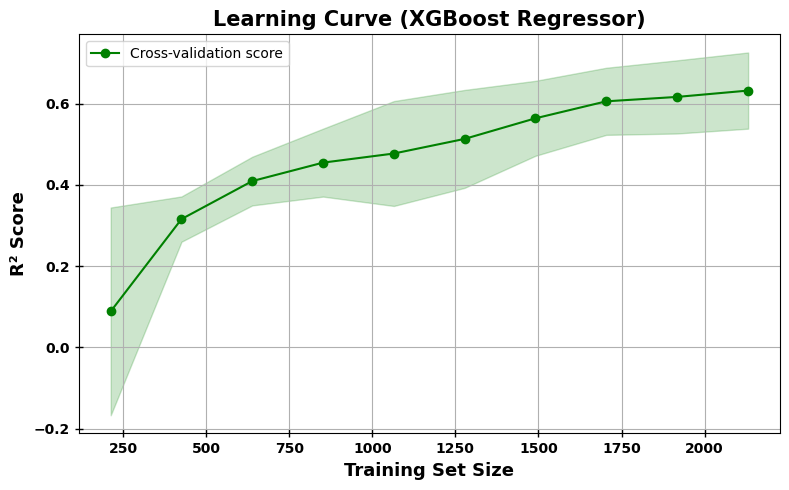

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# Define the model
model = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)

# Generate learning curve data (ignore training scores)
train_sizes, _, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Calculate mean and std for test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot only the cross-validation score
plt.figure(figsize=(8, 5))

plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

# Set title and labels with bold font
plt.title('Learning Curve (XGBoost Regressor)', fontsize=15, fontweight='bold')
plt.xlabel('Training Set Size', fontsize=13, fontweight='bold')
plt.ylabel('R² Score', fontsize=13, fontweight='bold')

# Set tick direction and bold tick labels
plt.tick_params(axis='both', direction='inout', length=6, width=1)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig('learning_curve_xgboost_cv_only.png', dpi=300)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from lightgbm import LGBMRegressor
import numpy as np

# Load the dataset
df = pd.read_csv('finall.csv')  # Replace with your actual file

# Drop rows with missing target values
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# Sanitize column names for LightGBM
X.columns = X.columns.str.replace('[\[\]<>]', '_', regex=True)

# Initialize the LightGBM Regressor
model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

# R² cross-validation
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R² scores from 5-fold CV:", r2_scores)
print("Mean R² score:", r2_scores.mean())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.150803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 92496
[LightGBM] [Info] Number of data points in the train set: 2131, number of used features: 581
[LightGBM] [Info] Start training from score 2.312120
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 92510
[LightGBM] [Info] Number of data points in the train set: 2131, number of used features: 575
[LightGBM] [Info] Start training from score 2.334570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of 

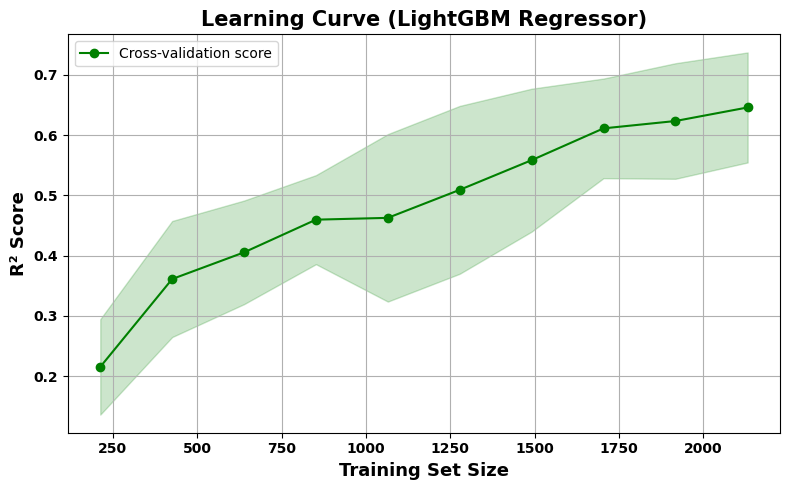

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor

# Ensure X and y are defined before this block
# Example:
# X, y = some_dataset.drop(columns="target"), some_dataset["target"]

# Define the LightGBM model
model = LGBMRegressor(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1
)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))

# Plot cross-validation score
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

# Add labels, title, and styling
plt.title('Learning Curve (LightGBM Regressor)', fontsize=15, fontweight='bold')
plt.xlabel('Training Set Size', fontsize=13, fontweight='bold')
plt.ylabel('R² Score', fontsize=13, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('learning_curve_lightgbm_cv_only.png', dpi=300)
plt.show()


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from catboost import CatBoostRegressor

# Load the dataset
df = pd.read_csv('finall.csv')  # Replace with your actual file

# Drop rows with missing target values
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# Initialize the CatBoost Regressor
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0  # Set to 100 to see training progress
)

# R² cross-validation
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("R² scores from 5-fold CV:", r2_scores)
print("Mean R² score:", r2_scores.mean())
print("Standard deviation of R² scores:", r2_scores.std())



R² scores from 5-fold CV: [0.51274297 0.65977141 0.7602088  0.64983807 0.72004917]
Mean R² score: 0.6605220852589
Standard deviation of R² scores: 0.08418348384247291


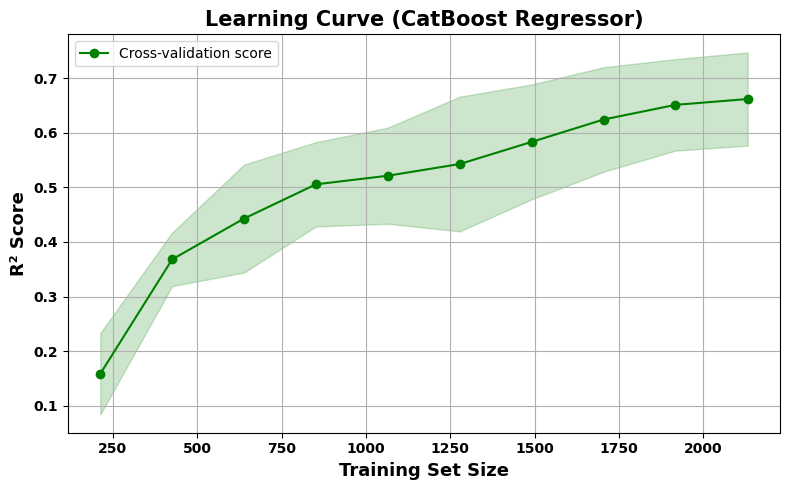

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor

# Ensure X and y are defined before running this code
# For example:
# X, y = some_dataset.drop(columns="target"), some_dataset["target"]

# Define the CatBoost model
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0  # Suppress training output
)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))


# Plot cross-validation score
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

# Add labels, title, and formatting
plt.title('Learning Curve (CatBoost Regressor)', fontsize=15, fontweight='bold')
plt.xlabel('Training Set Size', fontsize=13, fontweight='bold')
plt.ylabel('R² Score', fontsize=13, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('learning_curve_catboost_cv_only.png', dpi=300)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score

# Load and prepare the dataset
df = pd.read_csv('finall.csv')  # Replace with your actual file
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# Define pipeline: Imputer → Scaler → SVR
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

# Perform 5-fold cross-validation using R² as the scoring metric
r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Print results
print("R² scores from 5-fold cross-validation:", r2_scores)
print(f"Mean R² score: {r2_scores.mean():.4f}")
print(f"Standard deviation of R² scores: {r2_scores.std():.4f}")


R² scores from 5-fold cross-validation: [0.47653691 0.53545148 0.61301503 0.62208923 0.45196523]
Mean R² score: 0.5398
Standard deviation of R² scores: 0.0691


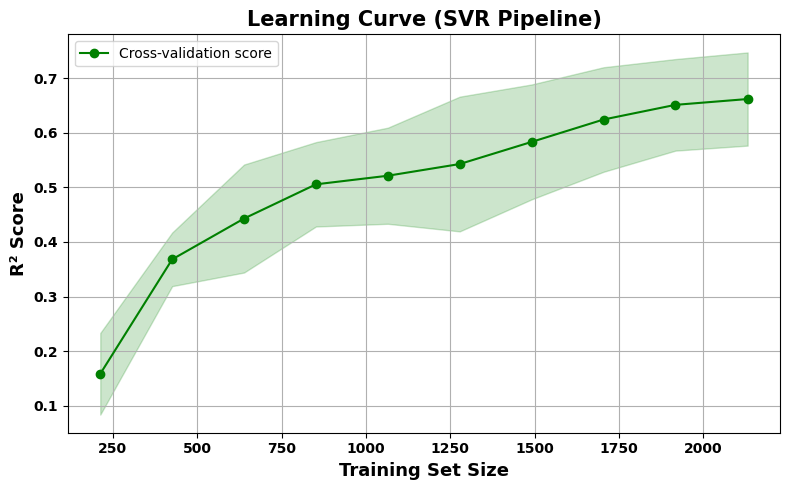

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))


# Plot cross-validation score
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

# Add labels, title, and formatting
plt.title('Learning Curve (SVR Pipeline)', fontsize=15, fontweight='bold')
plt.xlabel('Training Set Size', fontsize=13, fontweight='bold')
plt.ylabel('R² Score', fontsize=13, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('learning_curve_svr_pipeline.png', dpi=300)
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Ensure X and y are defined before running this code
# For example:
# X, y = some_dataset.drop(columns="target"), some_dataset["target"]

# Define the SVR model
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Calculate mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))

# Plot training score
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')

# Plot cross-validation score
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

# Add labels, title, and formatting
plt.title('Learning Curve (SVR)', fontsize=15, fontweight='bold')
plt.xlabel('Training Set Size', fontsize=13, fontweight='bold')
plt.ylabel('R² Score', fontsize=13, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('learning_curve_svr.png', dpi=300)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, r2_score

# Load the dataset
df = pd.read_csv('finall.csv')  # Replace with your actual file

# Drop rows with missing target values
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# Build pipeline: Imputation ➜ Scaling ➜ KNN Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5, weights='uniform', metric='minkowski'))
])

# Perform 5-fold cross-validation using R² as the scoring metric
r2_scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')

# Print results
print("R² scores from 5-fold cross-validation:", r2_scores)
print(f"Mean R² score: {r2_scores.mean():.4f}")
print(f"Standard deviation of R² scores: {r2_scores.std():.4f}")


R² scores from 5-fold cross-validation: [0.0861337  0.28691412 0.46942633 0.28646634 0.47530239]
Mean R² score: 0.3208
Standard deviation of R² scores: 0.1438


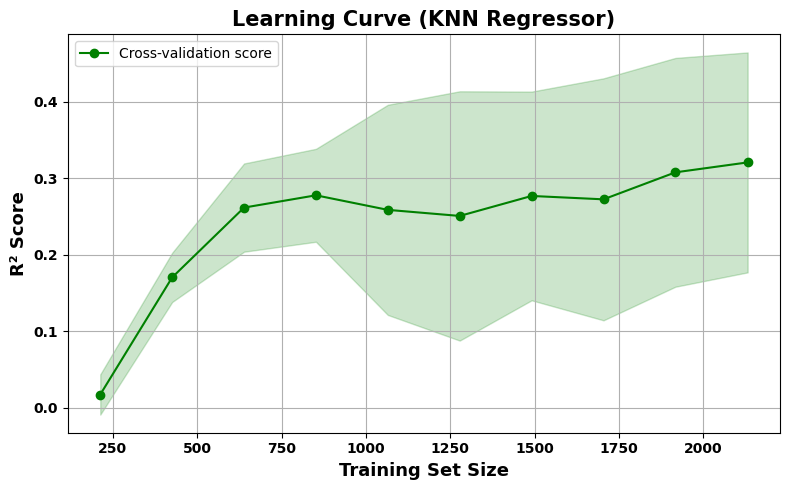

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Define the KNN regression pipeline
model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

# Compute learning curve
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X,
    y=y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Compute statistics
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='green')

# Add labels and formatting
plt.title('Learning Curve (KNN Regressor)', fontsize=15, fontweight='bold')
plt.xlabel('Training Set Size', fontsize=13, fontweight='bold')
plt.ylabel('R² Score', fontsize=13, fontweight='bold')

plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('learning_curve_knn.png', dpi=300)
plt.show()
